In [3]:
import pandas as pd

In [4]:
bdata_train=pd.read_csv('BankData_train.csv',delimiter=';')

In [5]:
bdata_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,19,student,single,secondary,no,302,no,no,cellular,16,jul,205,1,-1,0,unknown,yes
1,41,management,divorced,tertiary,no,4567,yes,yes,cellular,16,jul,106,1,-1,0,unknown,no
2,31,management,divorced,tertiary,no,414,no,yes,cellular,16,jul,241,1,-1,0,unknown,yes
3,37,management,married,tertiary,no,0,no,no,cellular,16,jul,268,2,182,3,success,yes
4,48,unemployed,married,secondary,no,817,no,no,cellular,16,jul,806,3,183,5,success,yes


#__default__: has credit in default?
#__housing__: has housing loan? 
#__loan__: has personal loan?
#__day__: last contact day of the week
#__month__: last contact month of year 
#__duration__: last contact duration, in seconds (numeric). 
          Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
#__campaign__: number of contacts performed during this campaign and for this client 
#__pdays__: number of days that passed by after the client was last contacted from a previous campaign 
#__previous__: number of contacts performed before this campaign and for this client
#__poutcome__: outcome of the previous marketing campaign

In [6]:
import matplotlib.pyplot as plt

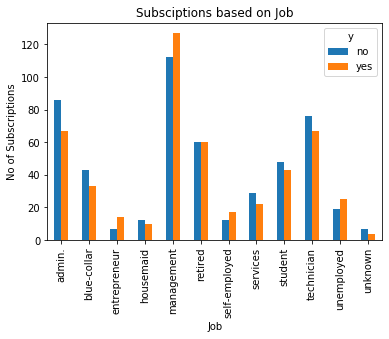

In [7]:
pd.crosstab(bdata_train.job,bdata_train.y).plot(kind='bar')
plt.title('Subsciptions based on Job')
plt.xlabel('Job')
plt.ylabel('No of Subscriptions')
plt.show()

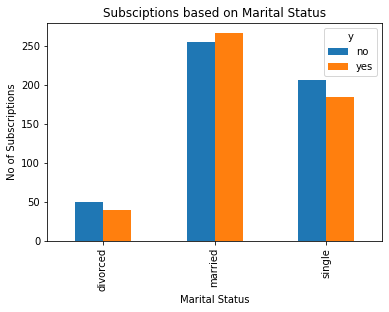

In [8]:
pd.crosstab(bdata_train.marital,bdata_train.y).plot(kind='bar')
plt.title('Subsciptions based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('No of Subscriptions')
plt.show()

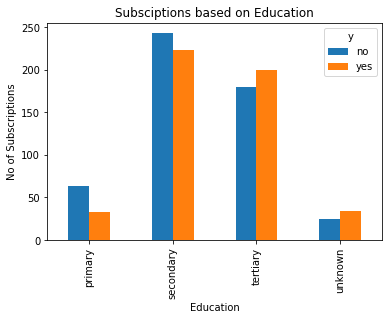

In [9]:
pd.crosstab(bdata_train.education,bdata_train.y).plot(kind='bar')
plt.title('Subsciptions based on Education')
plt.xlabel('Education')
plt.ylabel('No of Subscriptions')
plt.show()

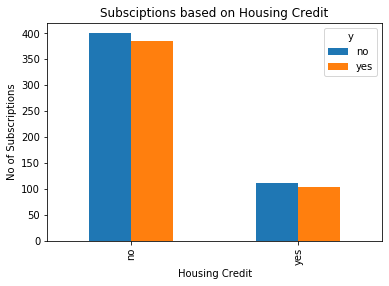

In [10]:
pd.crosstab(bdata_train.housing,bdata_train.y).plot(kind='bar')
plt.title('Subsciptions based on Housing Credit')
plt.xlabel('Housing Credit')
plt.ylabel('No of Subscriptions')
plt.show()

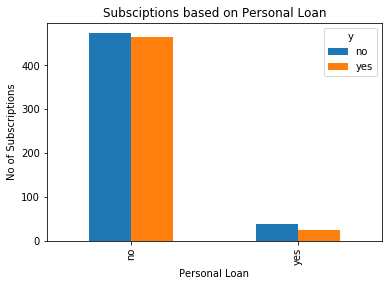

In [11]:
pd.crosstab(bdata_train.loan,bdata_train.y).plot(kind='bar')
plt.title('Subsciptions based on Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('No of Subscriptions')
plt.show()

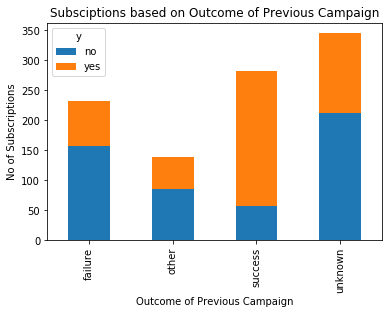

In [12]:
pd.crosstab(bdata_train.poutcome,bdata_train.y).plot(kind='bar',stacked=True)
plt.title('Subsciptions based on Outcome of Previous Campaign')
plt.xlabel('Outcome of Previous Campaign')
plt.ylabel('No of Subscriptions')
plt.show()

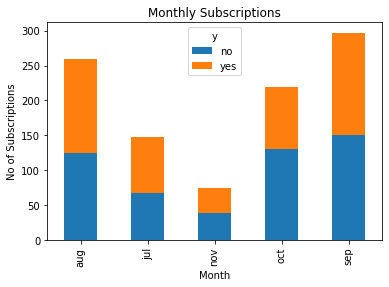

In [13]:
pd.crosstab(bdata_train.month,bdata_train.y).plot(kind='bar',stacked=True)
plt.title('Monthly Subscriptions')
plt.xlabel('Month')
plt.ylabel('No of Subscriptions')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Create the model with 10000 trees
model = RandomForestClassifier(n_estimators=10000, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [16]:
# Creating Dummy Variables
category=['job','marital','education','default','housing','loan','contact','month','poutcome']

In [17]:
bdata_train_new = bdata_train

In [18]:
for c in category:
    new_column = pd.get_dummies(bdata_train_new[c], prefix=c)
    bdata_train_dummy=bdata_train_new.join(new_column)
    bdata_train_new=bdata_train_dummy

In [19]:
bdata_train_new.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_jul',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [20]:
dummy_drop=['job_unknown','marital_divorced','education_unknown','default_no','housing_no','loan_no','contact_unknown','month_nov','poutcome_unknown']

In [21]:
bdata_train_final=bdata_train_new.drop(category+dummy_drop,axis=1)

In [22]:
x_train=bdata_train_final.drop(['y'],axis=1)

In [23]:
y_train=pd.DataFrame(bdata_train_final['y'])

In [24]:
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,loan_yes,contact_cellular,contact_telephone,month_aug,month_jul,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,19,302,16,205,1,-1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,41,4567,16,106,1,-1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2,31,414,16,241,1,-1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
3,37,0,16,268,2,182,3,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,48,817,16,806,3,183,5,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [25]:
y_train.head()

,y
0,yes
1,no
2,yes
3,yes
4,yes


In [26]:
y_train[y_train=='yes']='1'
y_train[y_train=='no']='0'

In [27]:
y_train.y=y_train.y.astype('int64')
y_train.y=y_train.y.astype('category')

In [28]:
# Fit on training data
model.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
for feature in zip(x_train.columns.values.tolist(), model.feature_importances_):
    print(feature)

('age', 0.07255154783575997)
('balance', 0.08572119881650651)
('day', 0.07336453413302958)
('duration', 0.27057870528640293)
('campaign', 0.0362854777190065)
('pdays', 0.0631034220305204)
('previous', 0.04553357584210077)
('job_admin.', 0.01157459381495778)
('job_blue-collar', 0.006078170032851531)
('job_entrepreneur', 0.003587471977545286)
('job_housemaid', 0.0033967955989770543)
('job_management', 0.0105620904594874)
('job_retired', 0.006615588414615358)
('job_self-employed', 0.003127417101666118)
('job_services', 0.003598701210875526)
('job_student', 0.006392899928632841)
('job_technician', 0.011221489868510032)
('job_unemployed', 0.005956340837674553)
('marital_married', 0.013619959442351058)
('marital_single', 0.011255813538125086)
('education_primary', 0.007381527206104177)
('education_secondary', 0.013086936888218005)
('education_tertiary', 0.011802457176641466)
('default_yes', 5.159103862299125e-05)
('housing_yes', 0.01223308617917479)
('loan_yes', 0.005606945316429969)
('conta

In [30]:
from sklearn.feature_selection import SelectFromModel

In [31]:
sfm = SelectFromModel(model, threshold=0.025)

In [32]:
sfm.fit(x_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000,
                                                 n_jobs=None, oob_score=False,
                                                 random_state=None, verbose=0,


In [33]:
for feature_list_index in sfm.get_support(indices=True):
    print(x_train.columns.values.tolist()[feature_list_index])

age
balance
day
duration
campaign
pdays
previous
contact_cellular
poutcome_failure
poutcome_success


In [34]:
x_important_train = sfm.transform(x_train)

In [35]:
x_important_train

array([[  19,  302,   16, ...,    1,    0,    0],
       [  41, 4567,   16, ...,    1,    0,    0],
       [  31,  414,   16, ...,    1,    0,    0],
       ...,
       [  72, 5715,   17, ...,    1,    0,    1],
       [  57,  668,   17, ...,    0,    0,    0],
       [  37, 2971,   17, ...,    1,    0,    0]])

In [36]:
bdata_test=pd.read_csv('BankData_eval.csv')

In [37]:
bdata_test_new = bdata_test

In [38]:
bdata_test_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,technician,married,secondary,no,0,yes,yes,cellular,4,jul,60,1,-1,0,unknown,no
1,29,management,single,tertiary,no,308,no,no,cellular,4,jul,162,2,184,1,failure,no
2,30,blue-collar,single,secondary,no,228,no,no,cellular,5,jul,232,1,365,1,failure,no
3,33,technician,single,tertiary,no,696,no,yes,cellular,5,jul,193,1,176,8,failure,no
4,32,blue-collar,single,secondary,no,228,no,no,telephone,5,jul,176,1,288,3,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,61,retired,married,tertiary,no,5267,no,no,cellular,11,jul,226,3,-1,0,unknown,yes
96,76,retired,married,primary,no,3324,no,no,cellular,11,jul,309,1,90,4,success,yes
97,75,blue-collar,married,secondary,no,6053,no,no,cellular,11,jul,865,2,190,1,failure,no
98,28,blue-collar,married,secondary,no,61,yes,no,cellular,11,jul,253,1,174,4,success,yes


In [39]:
category

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [40]:
for c in category:
    new_column = pd.get_dummies(bdata_test_new[c], prefix=c)
    bdata_test_dummy=bdata_test_new.join(new_column)
    bdata_test_new=bdata_test_dummy

In [41]:
bdata_test_new.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_jul',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [42]:
dummy_drop_test=['job_unknown','marital_divorced','education_unknown','default_no','housing_no','loan_no','poutcome_unknown']

In [43]:
bdata_test_final=bdata_test_new.drop(category+dummy_drop_test,axis=1)

In [44]:
x_test=bdata_test_final.drop(['y'],axis=1)

In [45]:
y_test=pd.DataFrame(bdata_test_final['y'])

In [46]:
y_test[y_test=='yes']='1'
y_test[y_test=='no']='0'
y_test.y=y_test.y.astype('int64')
y_test.y=y_test.y.astype('category')

In [47]:
[i for i in x_train.columns.values.tolist() if i not in x_test.columns.values.tolist()] 

['job_self-employed', 'default_yes', 'month_aug', 'month_oct', 'month_sep']

In [48]:
import numpy as np

In [49]:
job=pd.DataFrame(np.zeros(shape=(100,1)),columns=['job_self-employed'])
default=pd.DataFrame(np.zeros(shape=(100,1)),columns=['default_yes'])
month_1=pd.DataFrame(np.zeros(shape=(100,1)),columns=['month_aug'])
month_2=pd.DataFrame(np.zeros(shape=(100,1)),columns=['month_oct'])
month_3=pd.DataFrame(np.zeros(shape=(100,1)),columns=['month_sep'])

In [50]:
x_test=x_test.join(job)
x_test=x_test.join(default)
x_test=x_test.join(month_1)
x_test=x_test.join(month_2)
x_test=x_test.join(month_3)

In [51]:
x_test.columns.values.tolist()

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'housing_yes',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_jul',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'job_self-employed',
 'default_yes',
 'month_aug',
 'month_oct',
 'month_sep']

In [52]:
x_important_test = sfm.transform(x_test)

In [53]:
x_important_test

array([[ 3.9000e+01,  0.0000e+00,  4.0000e+00,  6.0000e+01,  1.0000e+00,
        -1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.9000e+01,  3.0800e+02,  4.0000e+00,  1.6200e+02,  2.0000e+00,
         1.8400e+02,  1.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 3.0000e+01,  2.2800e+02,  5.0000e+00,  2.3200e+02,  1.0000e+00,
         3.6500e+02,  1.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 3.3000e+01,  6.9600e+02,  5.0000e+00,  1.9300e+02,  1.0000e+00,
         1.7600e+02,  8.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 3.2000e+01,  2.2800e+02,  5.0000e+00,  1.7600e+02,  1.0000e+00,
         2.8800e+02,  3.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.5000e+01,  4.4800e+02,  5.0000e+00,  1.5100e+02,  1.0000e+00,
         2.9700e+02,  1.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 3.4000e+01,  3.8200e+02,  5.0000e+00,  1.4800e+02,  1.0000e+00,
         9.4000e+01,  1.0000e+00,  1.0000e+00

In [54]:
# Fit on training data
model.fit(x_important_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
y_pred = model.predict(x_important_test)

In [56]:
pred_prob = model.predict_proba(x_important_test)[:, 1]

In [57]:
pred_prob

array([0.1016, 0.2389, 0.7102, 0.511 , 0.581 , 0.184 , 0.1301, 0.0561,
       0.0975, 0.1286, 0.4378, 0.0565, 0.0824, 0.6437, 0.2139, 0.455 ,
       0.1402, 0.0352, 0.7165, 0.7268, 0.0242, 0.5321, 0.7897, 0.639 ,
       0.0487, 0.1213, 0.7485, 0.2815, 0.5136, 0.6941, 0.4232, 0.4721,
       0.5467, 0.0518, 0.2578, 0.512 , 0.6097, 0.6534, 0.639 , 0.523 ,
       0.7519, 0.0577, 0.7435, 0.0309, 0.388 , 0.0276, 0.0666, 0.5011,
       0.7852, 0.0548, 0.0384, 0.5452, 0.4888, 0.071 , 0.1645, 0.244 ,
       0.2044, 0.5794, 0.2959, 0.8122, 0.038 , 0.3456, 0.0672, 0.1261,
       0.2085, 0.7201, 0.3957, 0.3767, 0.7518, 0.7881, 0.1219, 0.1873,
       0.2316, 0.0706, 0.1797, 0.3471, 0.3918, 0.5431, 0.0775, 0.6457,
       0.592 , 0.4568, 0.4655, 0.0465, 0.6197, 0.0618, 0.0536, 0.611 ,
       0.3877, 0.7144, 0.3034, 0.452 , 0.0523, 0.0453, 0.0889, 0.606 ,
       0.3571, 0.4493, 0.6281, 0.5505])

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
roc_value = roc_auc_score(y_test, pred_prob)

In [60]:
roc_value

0.6057808109193095

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test, y_pred)

array([[32, 15],
       [31, 22]])

In [63]:
import sklearn.metrics as metrics

In [64]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

In [65]:
roc_auc = metrics.auc(fpr, tpr)

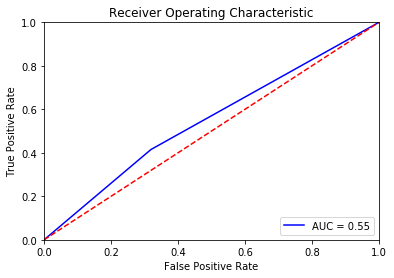

In [66]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()